In [28]:
import sympy as sp

# Define symbols
S, I, R = sp.symbols('S I R')
beta, gamma, alpha = sp.symbols('beta gamma alpha')

# Use S + I + R = 1 to eliminate R
R = 1 - S - I

# Define the reduced equations
dSdt = -beta * S * I + alpha * R
dIdt = beta * S * I - gamma * I

# Substitute R into the equations
dSdt = dSdt.subs(R, 1 - S - I)
dIdt = dIdt.subs(R, 1 - S - I)

# Find equilibrium points (dSdt = 0, dIdt = 0)
equilibrium_points = sp.solve([dSdt, dIdt], (S, I))

# Compute the Jacobian matrix
variables = sp.Matrix([S, I])
state_vector = sp.Matrix([dSdt, dIdt])
jacobian = state_vector.jacobian(variables)

# Evaluate the Jacobian at each equilibrium point
jacobian_at_equilibria = {eq: jacobian.subs({S: eq[0], I: eq[1]}) for eq in equilibrium_points}

# Display results
equilibrium_points, jacobian_at_equilibria

([(1, 0),
  (-(-alpha + alpha*(beta - gamma)/beta)/alpha,
   alpha*(beta - gamma)/(beta*(alpha + gamma)))],
 {(1,
   0): Matrix([
  [-alpha, -alpha - beta],
  [     0,  beta - gamma]]),
  (-(-alpha + alpha*(beta - gamma)/beta)/alpha,
   alpha*(beta - gamma)/(beta*(alpha + gamma))): Matrix([
  [-alpha - alpha*(beta - gamma)/(alpha + gamma), -alpha + beta*(-alpha + alpha*(beta - gamma)/beta)/alpha],
  [         alpha*(beta - gamma)/(alpha + gamma), -gamma - beta*(-alpha + alpha*(beta - gamma)/beta)/alpha]])})

In [41]:
equilibrium_points[1][1].simplify()

alpha*(beta - gamma)/(beta*(alpha + gamma))

In [43]:
# Linearize the system around (1, 0)
linearized_jacobian = jacobian.subs({S: 1, I: 0})

# Display the linearized Jacobian
linearized_jacobian

Matrix([
[-alpha, -alpha - beta],
[     0,  beta - gamma]])

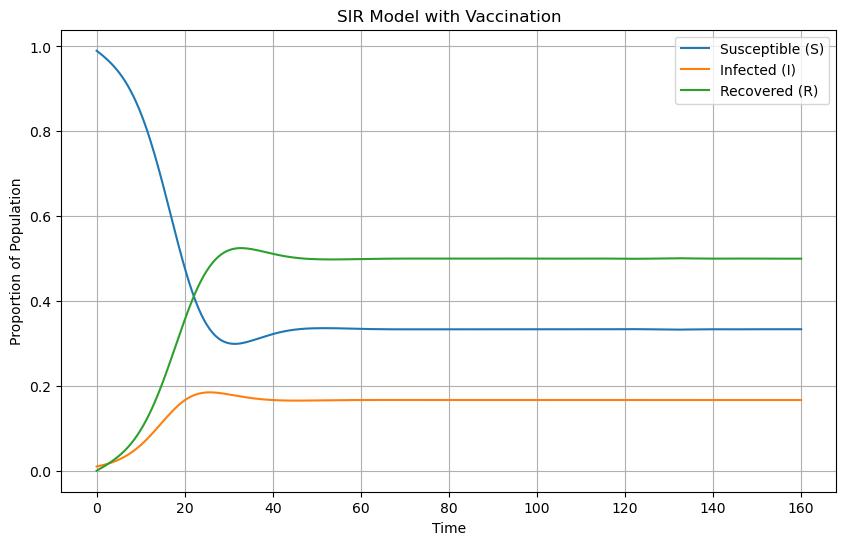

In [21]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

def sir_vaccination(t, y, beta, gamma, vaccination_rate, return_rate):
    """
    SIR model with vaccination and return to susceptibility.
    
    Parameters:
    - t: Time
    - y: State vector [S, I, R]
    - beta: Infection rate
    - gamma: Recovery rate
    - vaccination_rate: Rate of vaccination
    - return_rate: Rate at which vaccinated and recovered individuals return to susceptibility
    
    Returns:
    - dydt: Derivatives [dS/dt, dI/dt, dR/dt]
    """
    S, I, R = y
    dSdt = -beta * S * I - vaccination_rate*I + return_rate * R
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I + vaccination_rate * I - return_rate * R
    return [dSdt, dIdt, dRdt]

# Parameters
beta = 0.3          # Infection rate
gamma = 0.1         # Recovery rate
vaccination_rate = 0.5  # Vaccination rate
S0 = 0.99           # Initial susceptible population
I0 = 0.01           # Initial infected population
R0 = 0.0            # Initial recovered population
t_span = (0, 160)   # Time span
y0 = [S0, I0, R0]   # Initial conditions

# Define the return rate
return_rate = 0.2  # Rate at which vaccinated and recovered individuals return to susceptibility

# Solve the differential equations
solution = solve_ivp(
    sir_vaccination, 
    t_span, 
    y0, 
    args=(beta, gamma, vaccination_rate, return_rate), 
    t_eval=np.linspace(t_span[0], t_span[1], 500)
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label="Susceptible (S)")
plt.plot(solution.t, solution.y[1], label="Infected (I)")
plt.plot(solution.t, solution.y[2], label="Recovered (R)")
plt.title("SIR Model with Vaccination")
plt.xlabel("Time")
plt.ylabel("Proportion of Population")
plt.legend()
plt.grid()
plt.show()

In [7]:
# Calculate R0
R0 = beta / gamma

# Calculate the vaccination threshold to make Reff < 1
v_threshold = 1 - (1 / R0)

# Print the results
print(f"Basic Reproduction Number (R0): {R0:.2f}")
print(f"Vaccination Threshold (v_threshold): {v_threshold:.2%}")

# Analyze stability
if vaccination_rate >= v_threshold:
    print("With the current vaccination rate, the origin can be made stable.")
else:
    print("With the current vaccination rate, the origin cannot be made stable.")

Basic Reproduction Number (R0): 3.00
Vaccination Threshold (v_threshold): 66.67%
With the current vaccination rate, the origin cannot be made stable.


In [8]:
# Adjust vaccination rate to meet the threshold
vaccination_rate = v_threshold

# Analyze stability again
if vaccination_rate >= v_threshold:
    print("With the adjusted vaccination rate, the origin can be made stable.")
else:
    print("Even with the adjusted vaccination rate, the origin cannot be made stable.")

With the adjusted vaccination rate, the origin can be made stable.


In [22]:
# Substitute S=0, I=0, R=0 into the Jacobian
origin_jacobian = jacobian.subs({S: 1, I: 0, R: 0})

# Display the Jacobian at the origin
origin_jacobian


Matrix([
[-vaccination_rate,        -beta,  return_rate],
[                0, beta - gamma,            0],
[ vaccination_rate,        gamma, -return_rate]])

In [23]:
# Compute the eigenvalues of the origin Jacobian
eigenvalues = origin_jacobian.eigenvals()

# Display the eigenvalues
eigenvalues

{beta - gamma: 1, -return_rate - vaccination_rate: 1, 0: 1}

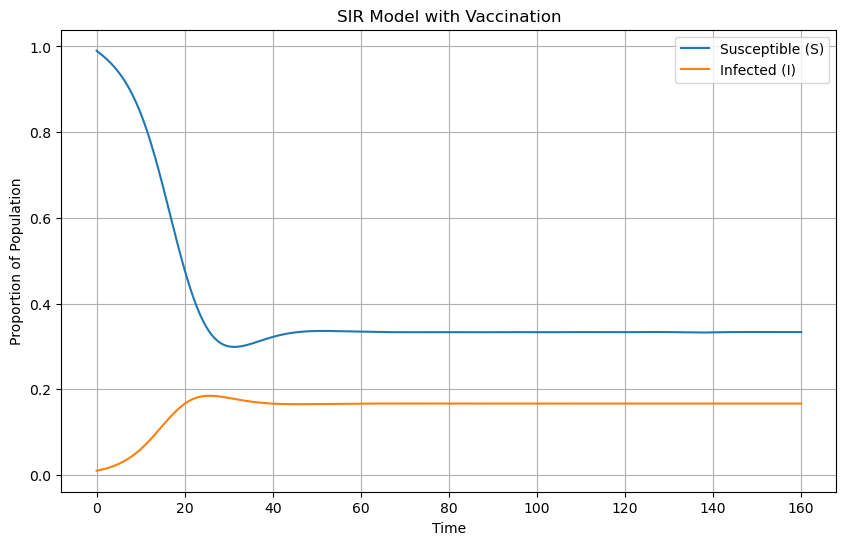

In [27]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

def sir_vaccination(t, y, beta, gamma, vaccination_rate, return_rate):
    """
    SIR model with vaccination and return to susceptibility.
    
    Parameters:
    - t: Time
    - y: State vector [S, I, R]
    - beta: Infection rate
    - gamma: Recovery rate
    - vaccination_rate: Rate of vaccination
    - return_rate: Rate at which vaccinated and recovered individuals return to susceptibility
    
    Returns:
    - dydt: Derivatives [dS/dt, dI/dt, dR/dt]
    """
    S, I = y
    dSdt = -beta * S * I - vaccination_rate*I + return_rate * (1.-S-I)
    dIdt = beta * S * I - gamma * I
    return [dSdt, dIdt]

# Parameters
beta = 0.3          # Infection rate
gamma = 0.1         # Recovery rate
vaccination_rate = 0.5  # Vaccination rate
S0 = 0.99           # Initial susceptible population
I0 = 0.01           # Initial infected population
R0 = 0.0            # Initial recovered population
t_span = (0, 160)   # Time span
y0 = [S0, I0]   # Initial conditions

# Define the return rate
return_rate = 0.2  # Rate at which vaccinated and recovered individuals return to susceptibility

# Solve the differential equations
solution = solve_ivp(
    sir_vaccination, 
    t_span, 
    y0, 
    args=(beta, gamma, vaccination_rate, return_rate), 
    t_eval=np.linspace(t_span[0], t_span[1], 500)
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label="Susceptible (S)")
plt.plot(solution.t, solution.y[1], label="Infected (I)")
#plt.plot(solution.t, 1-solution.y[0]-solution[1], label="Recovered (R)")
plt.title("SIR Model with Vaccination")
plt.xlabel("Time")
plt.ylabel("Proportion of Population")
plt.legend()
plt.grid()
plt.show()